# Crop Recommendation System Using ANNs

**Importing the libraries**



In [44]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

**Importing the dataset**

A Data set from Kaggle is used for training the ANN

In [45]:
dataset = pd.read_csv('Crop_recommendation.csv')
X=dataset.drop(labels=['label'], axis=1)
y = dataset.iloc[:, -1].values

**Splitting the dataset into the Training set and Test set**

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, train_size=0.80, random_state = 1)

**EDA and visualizing the features :**

Plotting the Humidity and Rainfall for various crops.

['apple' 'banana' 'blackgram' 'chickpea' 'coconut' 'coffee' 'cotton'
 'grapes' 'jute' 'kidneybeans' 'lentil' 'maize' 'mango' 'mothbeans'
 'mungbean' 'muskmelon' 'orange' 'papaya' 'pigeonpeas' 'pomegranate'
 'rice' 'watermelon']


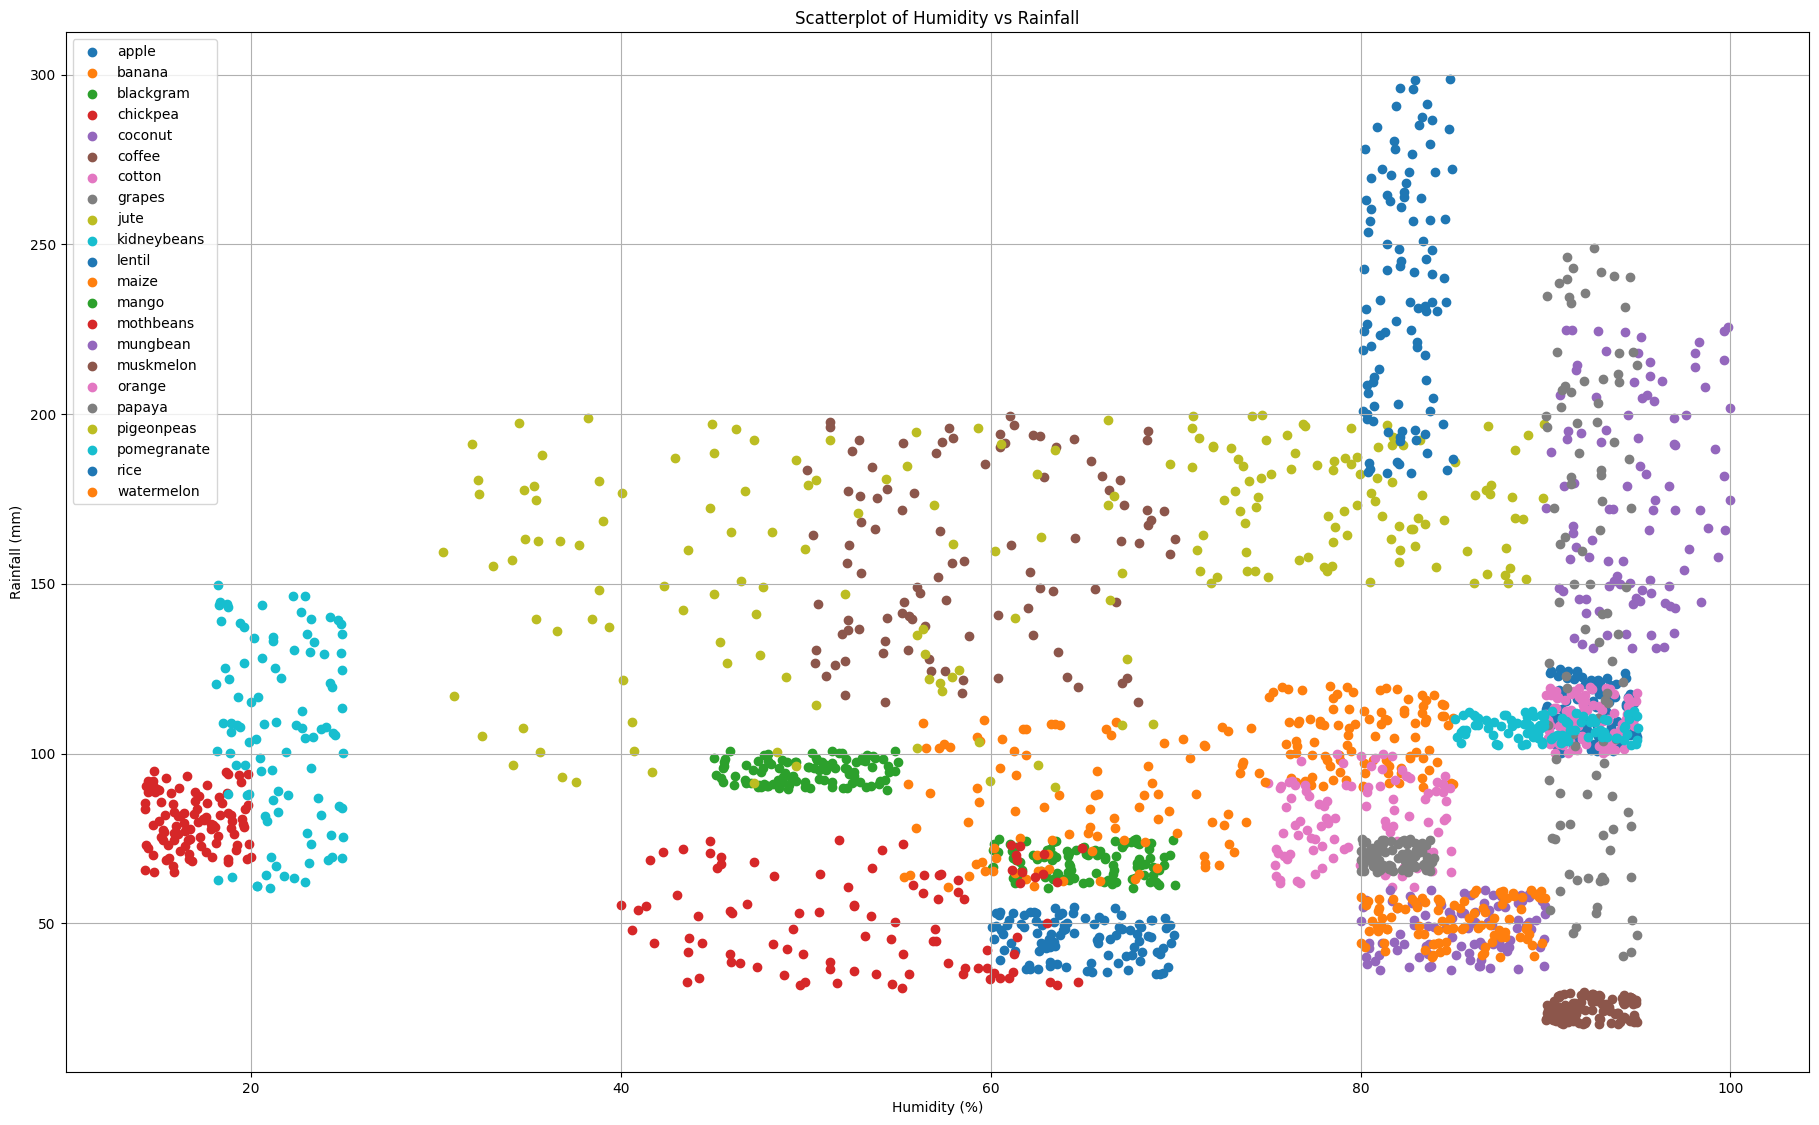

In [47]:
unique_features = np.unique(dataset['label'])
print(unique_features)

plt.figure(figsize=(22.5,13.5))
for feature in unique_features:
    data_subset = dataset[dataset['label'] == feature]
    plt.scatter(data_subset['humidity'], data_subset['rainfall'], label=feature, marker='o')

plt.xlabel('Humidity (%)')
plt.ylabel('Rainfall (mm)')
plt.title('Scatterplot of Humidity vs Rainfall')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

**Now plotting them one crop at a time for suitable temperature at which different crops can grow.**

<ipython-input-48-0a53a28b96cf>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_subset['temperature'])


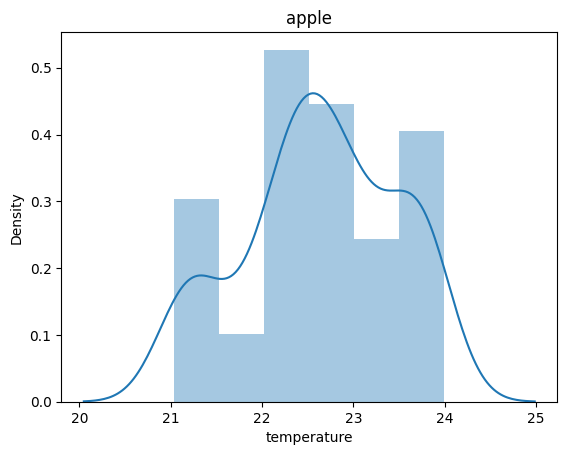

<ipython-input-48-0a53a28b96cf>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_subset['temperature'])


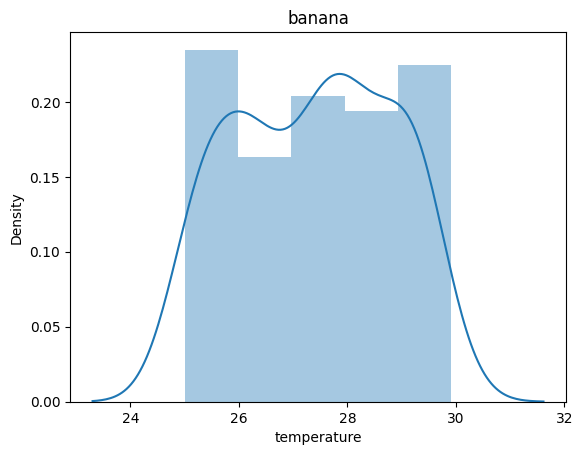

<ipython-input-48-0a53a28b96cf>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_subset['temperature'])


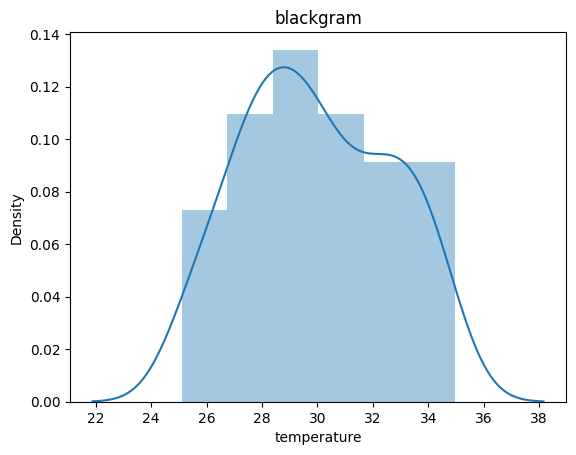

<ipython-input-48-0a53a28b96cf>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_subset['temperature'])


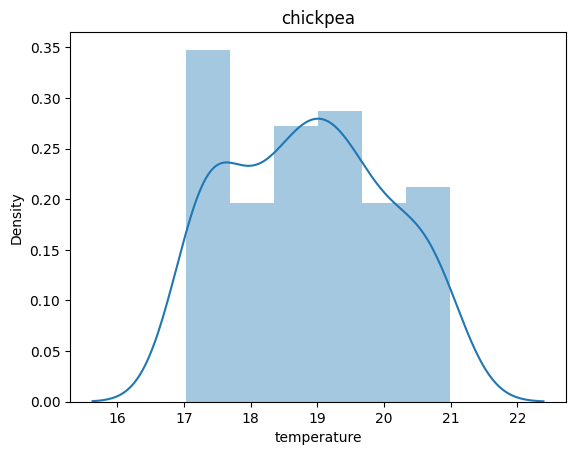

<ipython-input-48-0a53a28b96cf>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_subset['temperature'])


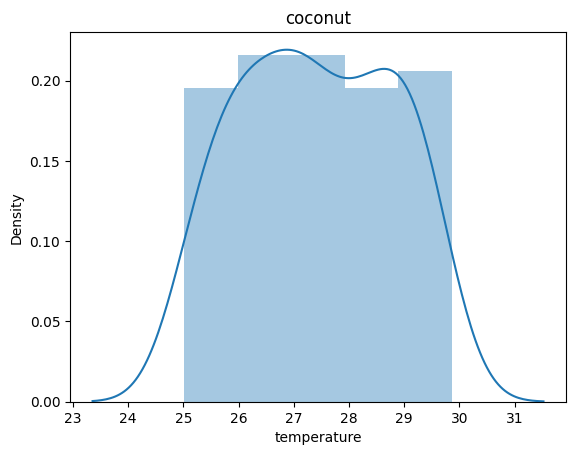

<ipython-input-48-0a53a28b96cf>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_subset['temperature'])


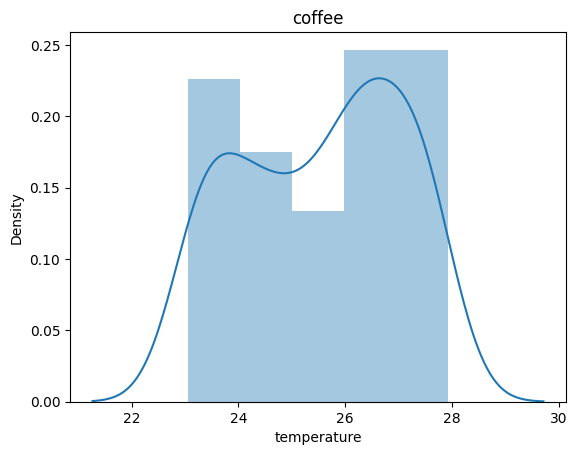

<ipython-input-48-0a53a28b96cf>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_subset['temperature'])


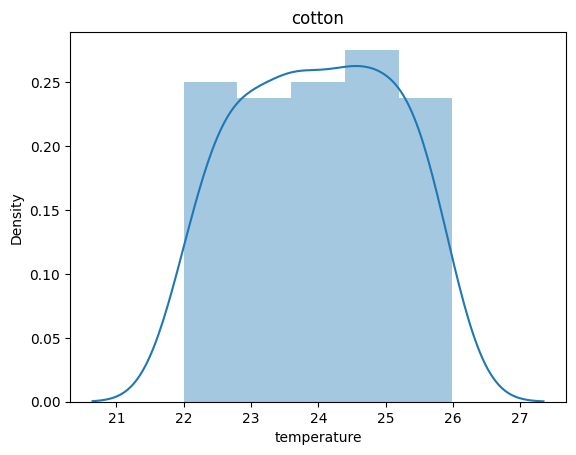

<ipython-input-48-0a53a28b96cf>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_subset['temperature'])


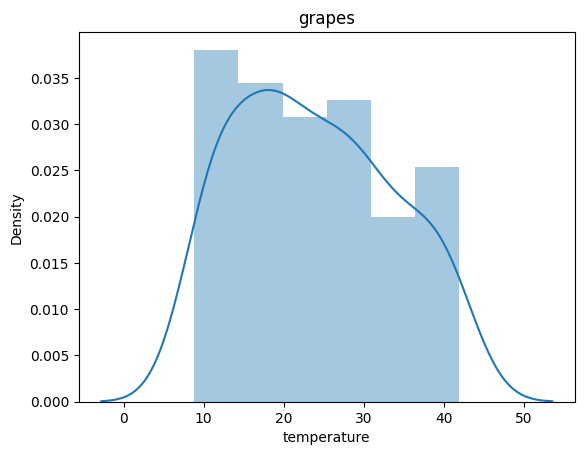

<ipython-input-48-0a53a28b96cf>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_subset['temperature'])


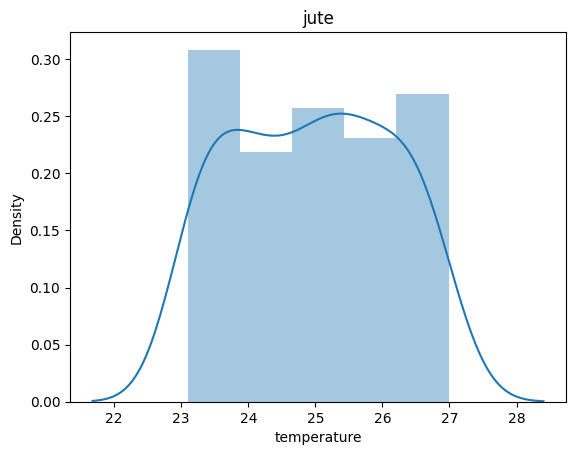

<ipython-input-48-0a53a28b96cf>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_subset['temperature'])


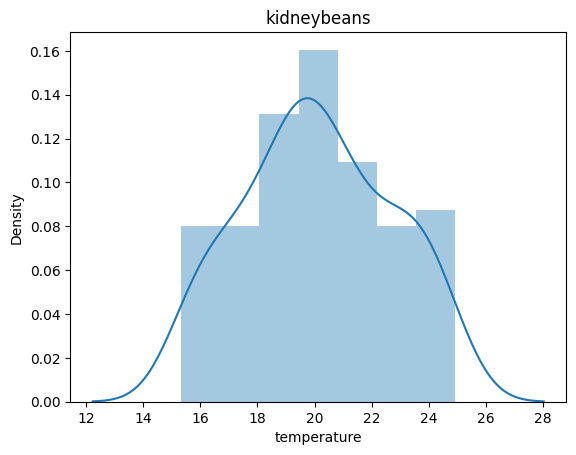

<ipython-input-48-0a53a28b96cf>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_subset['temperature'])


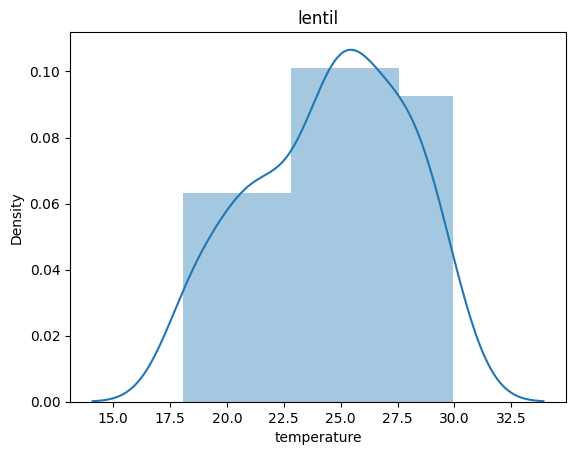

<ipython-input-48-0a53a28b96cf>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_subset['temperature'])


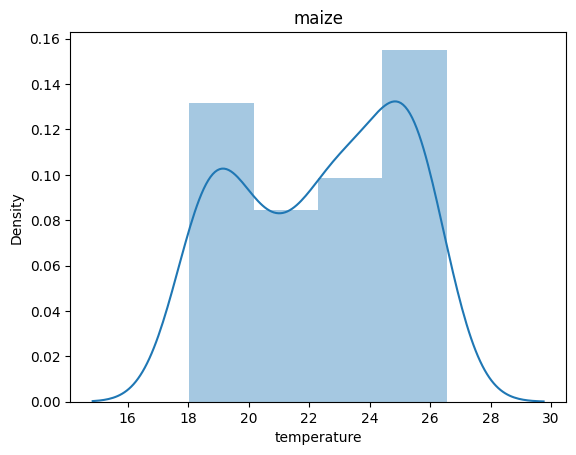

<ipython-input-48-0a53a28b96cf>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_subset['temperature'])


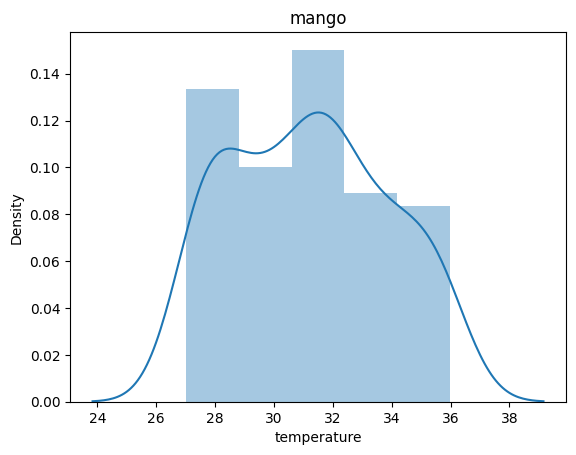

<ipython-input-48-0a53a28b96cf>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_subset['temperature'])


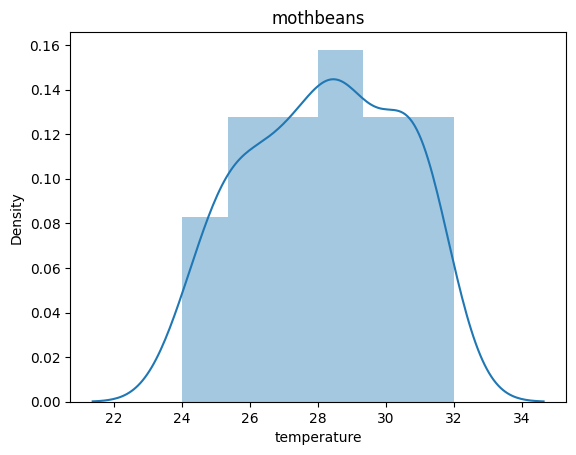

<ipython-input-48-0a53a28b96cf>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_subset['temperature'])


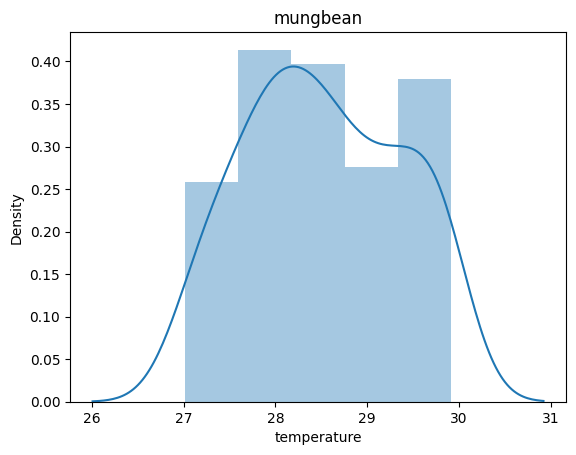

<ipython-input-48-0a53a28b96cf>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_subset['temperature'])


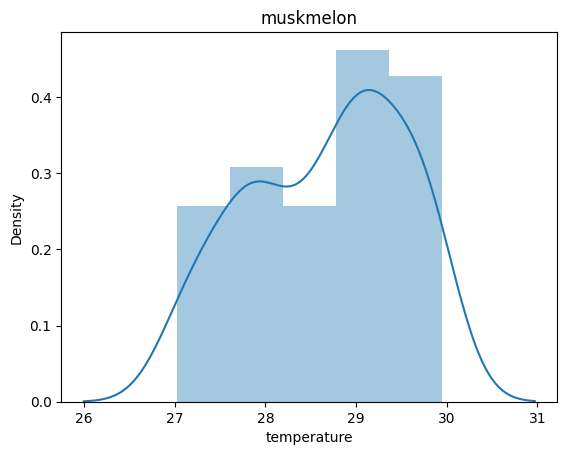

<ipython-input-48-0a53a28b96cf>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_subset['temperature'])


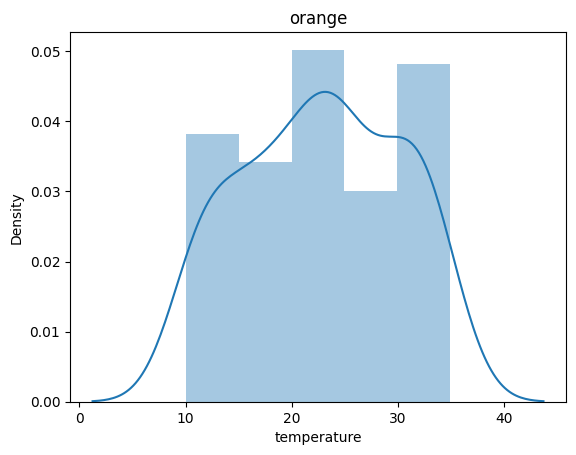

<ipython-input-48-0a53a28b96cf>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_subset['temperature'])


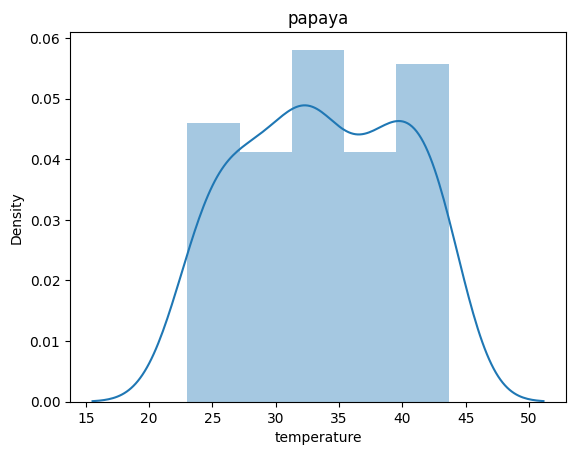

<ipython-input-48-0a53a28b96cf>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_subset['temperature'])


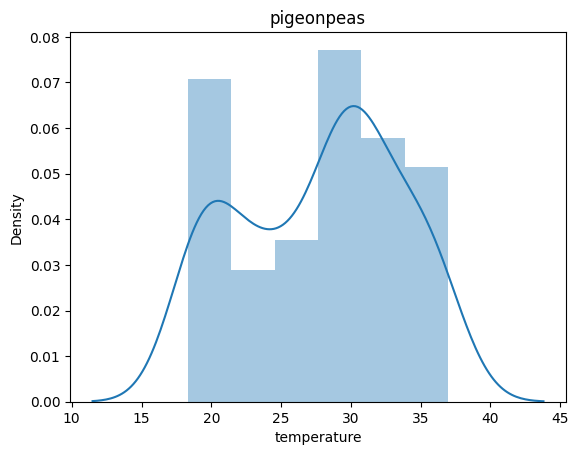

<ipython-input-48-0a53a28b96cf>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_subset['temperature'])


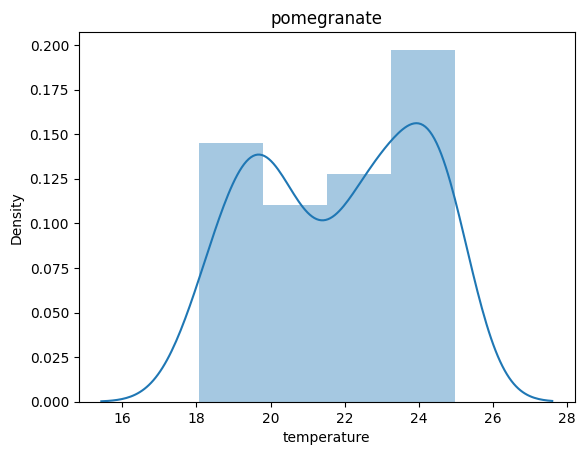

<ipython-input-48-0a53a28b96cf>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_subset['temperature'])


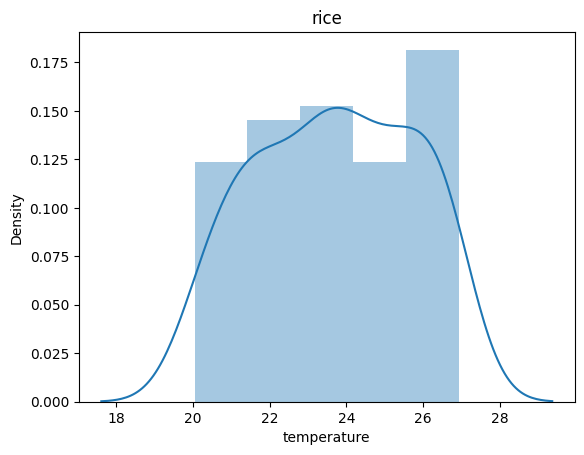

<ipython-input-48-0a53a28b96cf>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_subset['temperature'])


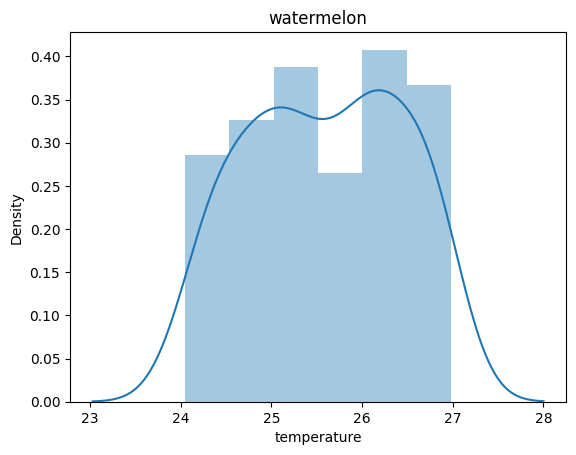

In [48]:
import seaborn as sns
for feature in unique_features:
    data_subset = dataset[dataset['label'] == feature]
    sns.distplot(data_subset['temperature'])
    plt.title(feature)
    plt.show()

**Now , Plotting a Bar graph with mean temperature at which every crop grows**.

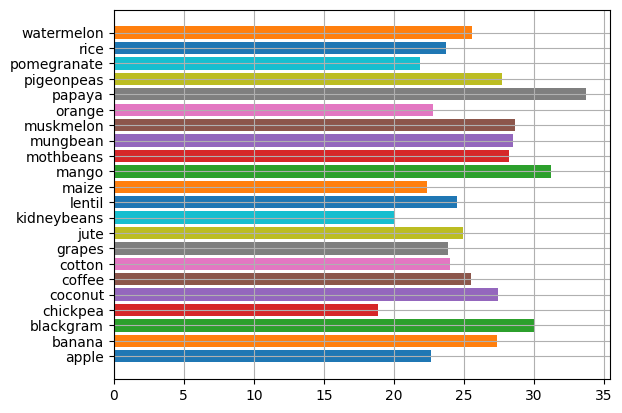

In [49]:
for feature in unique_features:
    data_subset = dataset[dataset['label'] == feature]
    mean_of_temps = np.mean(data_subset['temperature'])
    plt.barh(feature , mean_of_temps)
    plt.grid(True)


plt.show()

**Feature Engineering**

**Dropping constant Features**

Features with a very minute or no change throghout the dataset are redundant and hence can be removed from the dataset because these sort of features are redundant and add nothing to the model during it's learning.
Here we are setting our Variance(Measurment of how spread out or dispersed the values are, indicating data's variability) Threshold as 0.5.
Meaning any column with variance less than 0.5 will be removed.

In [50]:
X_train = pd.DataFrame(X_train)
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train)


VarianceThreshold(threshold=0)

In [51]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True])

=>No column in the dataset has been found wiht a variance of or below 0.5



**Getting the columns with variance more than 0.5 i.e.,ALL**

In [52]:
X_train.columns[var_thres.get_support()]

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], dtype='object')

***A piece of code that can be used to remove the columns with constant or almost constant entries without dropping the columns manually can be.***

In [53]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_thres.get_support()]]
print(constant_columns)

[]


As we have no column with such condition the variable constant column is an empty list.

And hence in the code below no column will be dropped.

In [54]:
X_train.drop(constant_columns,axis=1)

,N,P,K,temperature,humidity,ph,rainfall
1863,1,12,30,27.754298,95.946438,5.562224,131.090008
987,11,10,45,22.630452,88.455772,6.397996,109.035760
375,5,74,21,16.244692,21.357939,5.591704,66.970533
1071,105,88,54,25.787498,84.511942,6.020445,114.200546
37,95,39,36,23.863305,83.152508,5.561399,285.249365
...,...,...,...,...,...,...,...
960,1,27,36,23.985988,93.342366,5.684995,104.991282
905,31,25,38,24.962732,92.405014,6.497367,109.416919
1096,92,81,52,28.010680,76.528081,5.891414,103.704078
235,28,58,81,17.475010,16.543148,6.180427,93.350343


**Removing the highly co-related Features (Using Pearson Correlation)**

Removing highly correlated features is important in feature selection because it helps reduce redundancy and multicollinearity, which can lead to unstable model estimates and make it challenging for machine learning algorithms to learn the true relationships between variables.

In [55]:
cor = X_train.corr()
print(cor)

                    N         P         K  temperature  humidity        ph  \
N            1.000000 -0.218255 -0.123510     0.031661  0.191702  0.081523   
P           -0.218255  1.000000  0.728185    -0.139788 -0.128617 -0.133510   
K           -0.123510  0.728185  1.000000    -0.170403  0.178952 -0.166429   
temperature  0.031661 -0.139788 -0.170403     1.000000  0.221012 -0.015523   
humidity     0.191702 -0.128617  0.178952     0.221012  1.000000 -0.015720   
ph           0.081523 -0.133510 -0.166429    -0.015523 -0.015720  1.000000   
rainfall     0.068931 -0.064121 -0.054081    -0.012135  0.102803 -0.119042   

             rainfall  
N            0.068931  
P           -0.064121  
K           -0.054081  
temperature -0.012135  
humidity     0.102803  
ph          -0.119042  
rainfall     1.000000  


**Now this is the correlation between various features now a heatmap will be used to demonstrate these values better.**

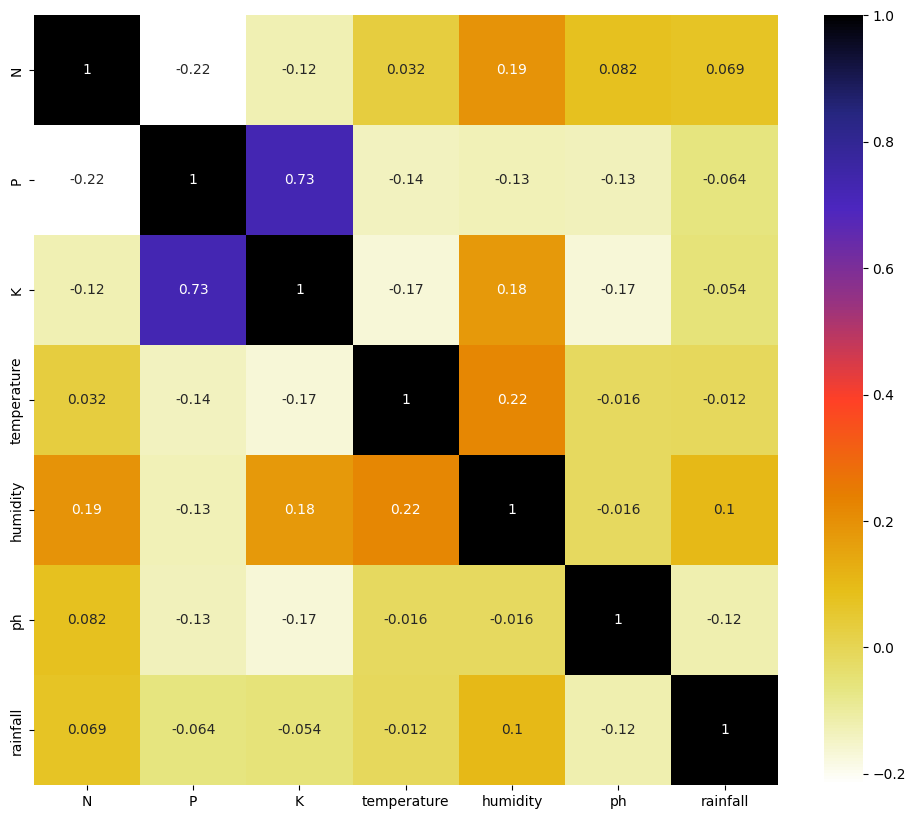

In [56]:
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

**As we can see in the above heatmap that the Phosphorus(P) and Pottasium(K) content in the soil are highly correlated (0.73)**

**Therefore a function is defined which removes the Features(one of them) with correlation above a certain threshold (in this case set to be as 0.7).**

In [57]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute value and not is it is negatively correlated or positively
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [58]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

1

**The list of correlated features are :**

In [59]:
corr_features

{'K'}

So , The above feature("Pottasium") will be dropped from trainig tst and test set.

In [60]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,N,P,temperature,humidity,ph,rainfall
1276,25,129,17.986678,81.177121,5.777271,72.371277
1446,106,20,29.730197,90.970157,6.342573,20.490356
335,33,59,22.642369,21.593961,5.947000,122.388601
1458,89,9,29.471563,90.770696,6.668383,28.752261
2038,62,49,24.217446,82.852840,7.479248,166.136589
...,...,...,...,...,...,...
1508,22,144,21.911913,91.687481,6.499227,117.076128
1595,40,120,23.805938,92.488795,5.889481,119.633555
1032,105,74,25.145176,81.382041,6.098369,119.218154
1330,118,15,24.214957,84.205770,6.538006,48.011385


**Now , The features and their relation with the dependant variable will be found basically the importance of the various features.**

The feature importance of each feature of the dataset is determined using the feature importance property of the model.

Feature importance gives a score for each feature of the data, the higher the score more important or relevant is the feature towards the output variable.

In [61]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train,y_train)

ExtraTreesClassifier()

In [62]:
print(model.feature_importances_)

[0.11461856 0.14241108 0.18618351 0.08958322 0.21026409 0.05996676
 0.19697278]


**A bar graph showing the features and their importance :**

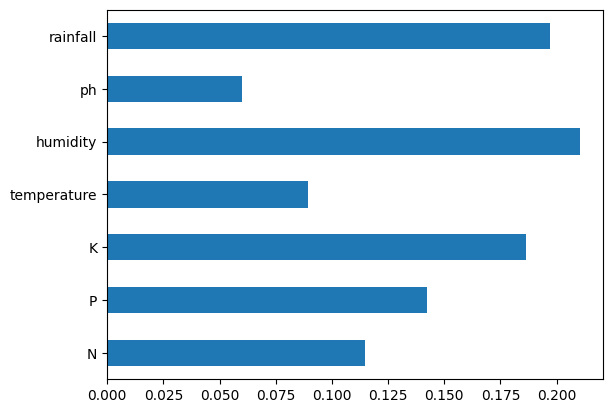

In [63]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.plot(kind='barh')
plt.show()

So , as we can the see the most important feature is the rainfall and the least important is pH and therre is no feature with drastically less importance then than the others.

**Therefore, NO FEATURE will be removed in this step.**

**Finding Outliers**

We need to remove the outliers as the ANNs are highly sensitive to outliers in the data.

There are two methods to find outliers in a data set :

1)Using Z-Score (If the data is normally distributed)

2)Using IQR (If the distribution is skewed)

**Plotting the "Distplot" for various features (training set values)**

<ipython-input-64-c16fd32401ac>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[column])


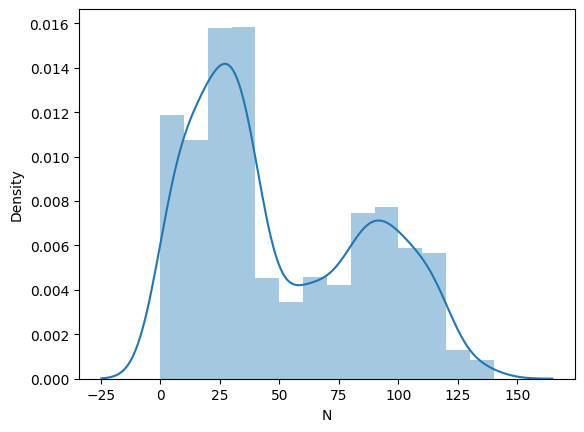

<ipython-input-64-c16fd32401ac>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[column])


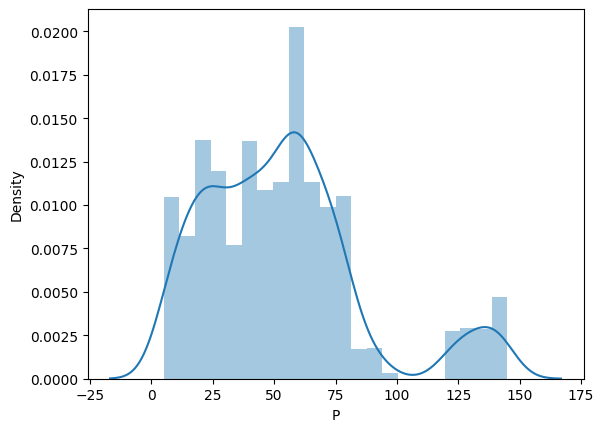

<ipython-input-64-c16fd32401ac>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[column])


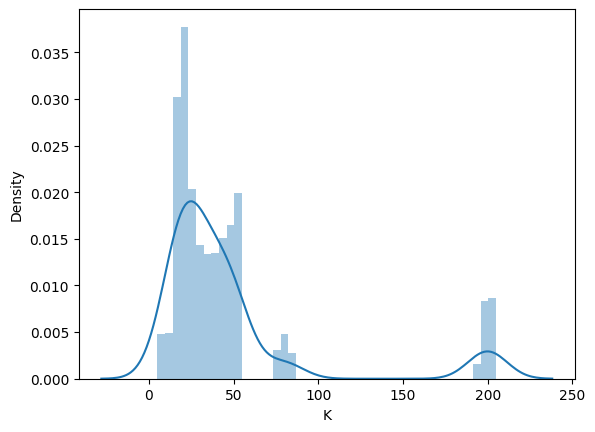

<ipython-input-64-c16fd32401ac>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[column])


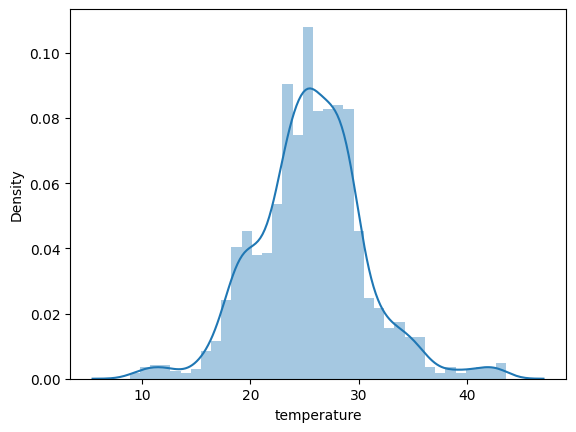

<ipython-input-64-c16fd32401ac>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[column])


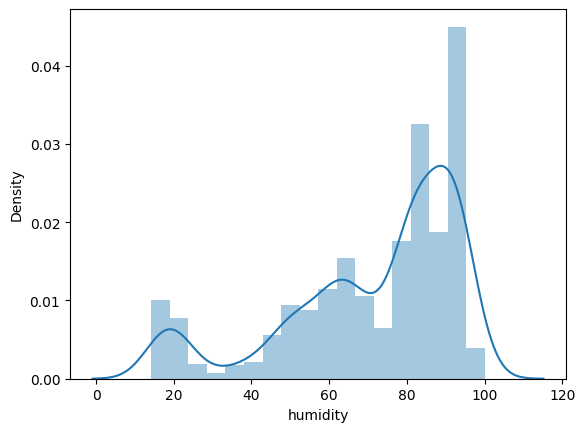

<ipython-input-64-c16fd32401ac>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[column])


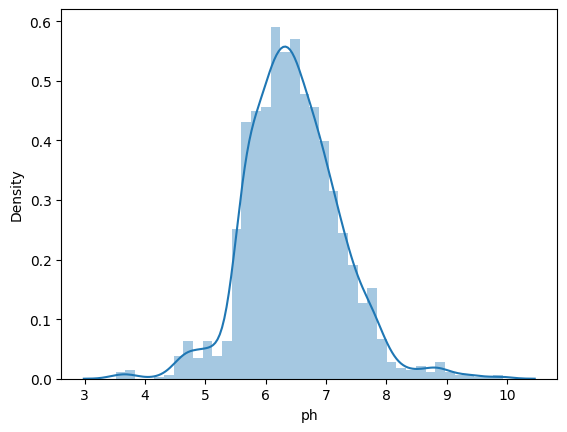

<ipython-input-64-c16fd32401ac>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[column])


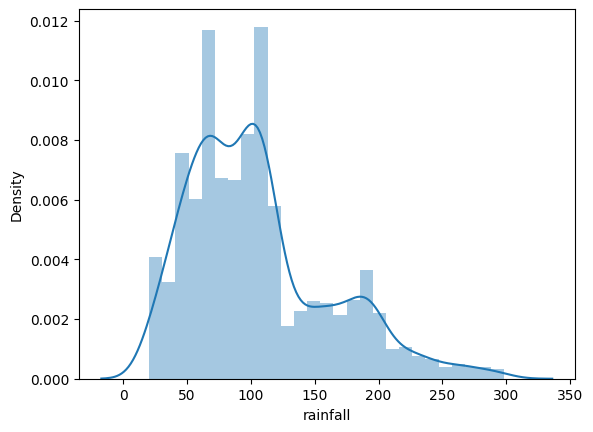

In [64]:
for column in X.columns:
    sns.distplot(X_train[column])
    plt.show() #For showing different features in different graphs

**Therefore , pH and Temprature are the only normal distributions amongst all the features so Z-Score will be applied on them.**

First we need to combine X_train and Y_train to get a collective training set and then convert the resulting array into a pandas dataframe so as to get the column names.

In [65]:
training_set = np.column_stack((X_train, y_train))
print(training_set)
training_set_labeled = pd.DataFrame(training_set, columns=dataset.columns)

[[1.0 12.0 30.0 ... 5.56222383 131.09000759999998 'coconut']
 [11.0 10.0 45.0 ... 6.397995609 109.0357597 'pomegranate']
 [5.0 74.0 21.0 ... 5.591704013999999 66.97053257 'kidneybeans']
 ...
 [92.0 81.0 52.0 ... 5.891413895 103.7040783 'banana']
 [28.0 58.0 81.0 ... 6.18042747 93.35034262 'chickpea']
 [95.0 74.0 50.0 ... 6.002481605 110.10323 'banana']]


In [66]:
def detect_outliers(data):
    outliers = []
    threshold=3.5
    mean = np.mean(data)
    std =np.std(data)


    for i in data:
        z_score= (i - mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [67]:
outlier_ph=detect_outliers(X_train.ph)
outlier_ph

[9.45949344,
 9.679240873,
 3.558822825,
 3.510404312,
 3.532008668,
 3.71105919,
 9.93509073,
 9.406887533,
 9.254089438,
 3.692863601,
 9.926212291,
 9.392694614]

**So,The above values are the outliers and hence need ot be removed from the dataset.**

In [68]:
training_set_labeled = training_set_labeled[~training_set_labeled['ph'].isin(outlier_ph)]
training_set_labeled.shape

(1748, 8)

The same will be done for temperature.

In [69]:
outlier_temp=detect_outliers(X_train.temperature)
outlier_temp

[43.67549305]

In [70]:
training_set_labeled = training_set_labeled[~training_set_labeled['temperature'].isin(outlier_temp)]
training_set_labeled.shape

(1747, 8)

So,The outliers from these two features are removed from the dataset

Now , The outliers from the more skewed distributions (N,P,K,Humidity and Rainfall)

**They'll be removed by using the Inter-Quantile Range (IQR).**

In [71]:
def detect_outliers_quantile(data):
    outliers = []
    threshold=3
    quantile1, quantile3= np.percentile(data,[25,75])
    iqr=quantile3-quantile1

    upper_bridge=quantile3 +(threshold * iqr)
    lower_bridge=quantile1 -(threshold * iqr)


    for i in data:
        if i > upper_bridge or i < lower_bridge:
            outliers.append(i)
    return outliers

**So , The outliers are needed to be found out and then removed.**


(Generally, it should be removed but removing them here is leading to a loss of two classes in y_train so it will not be removed here.)

In [72]:
unique_values = np.unique(training_set_labeled['label'])
print(unique_values.shape )
skewed_features = [X_train.N , X_train.P , X_train.K , X_train.humidity , X_train.rainfall]

for i in skewed_features:
    outlier_skewed = detect_outliers_quantile(i)
    print('Outliers in ' , i.name)
    print(outlier_skewed)
    #training_set_labeled = training_set_labeled[~training_set_labeled[i.name].isin(outlier_skewed)]
    print(training_set_labeled.shape)
    unique_values = np.unique(training_set_labeled['label'])
    print(unique_values.shape )



(22,)
Outliers in  N
[]
(1747, 8)
(22,)
Outliers in  P
[]
(1747, 8)
(22,)
Outliers in  K
[196, 205, 201, 196, 197, 195, 200, 200, 203, 196, 196, 204, 204, 197, 198, 198, 197, 201, 198, 201, 204, 205, 203, 205, 203, 197, 196, 202, 198, 198, 197, 204, 201, 201, 204, 196, 196, 201, 204, 204, 202, 201, 195, 205, 199, 196, 199, 199, 198, 197, 204, 203, 197, 197, 204, 200, 198, 203, 203, 195, 203, 203, 197, 196, 198, 203, 203, 200, 203, 203, 195, 197, 197, 196, 202, 205, 199, 200, 205, 196, 204, 195, 205, 199, 205, 201, 202, 205, 197, 195, 197, 200, 196, 199, 196, 202, 199, 200, 201, 200, 196, 203, 195, 200, 203, 196, 202, 197, 204, 202, 197, 196, 199, 201, 195, 195, 197, 200, 195, 204, 197, 198, 204, 204, 204, 205, 202, 204, 201, 197, 195, 201, 198, 200, 201, 195, 201, 196, 195, 198, 203, 204, 202, 201, 204, 197, 198, 203, 205]
(1747, 8)
(22,)
Outliers in  humidity
[]
(1747, 8)
(22,)
Outliers in  rainfall
[]
(1747, 8)
(22,)


In [73]:
training_set_labeled.shape

(1747, 8)

Creating X_train and y_train again.

In [74]:
X_train = training_set_labeled.iloc[ : , :-1].values
y_train = training_set_labeled.iloc[ : , 7:8].values #to get a 2-D array
print(X_train.shape)
print(y_train.shape)

(1747, 7)
(1747, 1)


In [75]:
y_test = y_test.reshape(-1, 1)
print(y_test.shape)
y_new = np.row_stack((y_train, y_test))
print(y_new.shape)

(440, 1)
(2187, 1)


**Feature Extraction :**

We will be using the **Linear Discriminant analysis (LDA)** for feature extraction technique.

LDA is used to generate seperation between classes by making new features using the existing set of features without much loss in variance of the data.

**For LDA first we have to perform feature scaling**

In [76]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


**Applying LDA**

In [77]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 5)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**One hot-encoding the dependent variable**

One-hot encoding is an important preprocessing step when training an Artificial Neural Network (ANN) because it allows the network to effectively handle categorical data, which is in a non-numeric format.

In [78]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse=False), [0])], remainder='passthrough',)
y_train= np.array(ct.fit_transform(y_train))
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


***sparse=False***

Is Important so as to convert the Sparse matrix which the Encoder will return to a dense matrix which will then be conviniently used by the ANN

**Building the ANN**

**Initializing the ANN**

In [79]:
ann = tf.keras.models.Sequential()

**Adding layers to the ANN**

In [80]:
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))
ann.add(tf.keras.layers.Dense(units=20, activation='relu'))
ann.add(tf.keras.layers.Dense(units=22, activation='softmax')) #Output layer

**Compiling the ANN**

In [81]:
ann.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

**Training the ANN on the Training set**

In [82]:
print(X_train.shape)
print(y_train.shape)

(1747, 5)
(1747, 22)


In [83]:
ann.fit(X_train, y_train, batch_size = 128, epochs = 200)

Epoch 1/200
14/14 [==============================] - 1s 4ms/step - loss: 3.8887 - accuracy: 0.1145
Epoch 2/200
14/14 [==============================] - 0s 3ms/step - loss: 3.3481 - accuracy: 0.1391
Epoch 3/200
14/14 [==============================] - 0s 3ms/step - loss: 2.9388 - accuracy: 0.1763
Epoch 4/200
14/14 [==============================] - 0s 3ms/step - loss: 2.7275 - accuracy: 0.2135
Epoch 5/200
14/14 [==============================] - 0s 3ms/step - loss: 2.5682 - accuracy: 0.2759
Epoch 6/200
14/14 [==============================] - 0s 3ms/step - loss: 2.4276 - accuracy: 0.2982
Epoch 7/200
14/14 [==============================] - 0s 3ms/step - loss: 2.2994 - accuracy: 0.3309
Epoch 8/200
14/14 [==============================] - 0s 3ms/step - loss: 2.1719 - accuracy: 0.3240
Epoch 9/200
14/14 [==============================] - 0s 3ms/step - loss: 2.0486 - accuracy: 0.3366
Epoch 10/200
14/14 [==============================] - 0s 3ms/step - loss: 1.9273 - accuracy: 0.3795
Epoch 11/

**Predicting a result**

In [84]:
pred = ann.predict(lda.transform(sc.transform([[91,43,44,21.87974,83.00027,6.5111,203.9355]])))
pred = ct.named_transformers_['encoder'].inverse_transform(pred)
print(pred)

1/1 [==============================] - 0s 95ms/step
[['rice']]
